In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df1 = pd.read_csv('delhi_traffic_features.csv')
df2 = pd.read_csv('delhi_traffic_target.csv')

In [4]:
df = pd.merge(df1, df2, how = 'left', on='Trip_ID')

In [5]:
df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0


In [6]:
df.isnull().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [7]:
df.isna().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [8]:
df.dtypes

Trip_ID                   object
start_area                object
end_area                  object
distance_km              float64
time_of_day               object
day_of_week               object
weather_condition         object
traffic_density_level     object
road_type                 object
average_speed_kmph       float64
travel_time_minutes      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
 10  travel_time_minutes    4000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [10]:
df.describe()

,distance_km,average_speed_kmph,travel_time_minutes
count,4000.000000,4000.000000,4000.000000
mean,13.342965,28.085300,40.155925
std,6.367559,17.057224,31.883265
min,1.510000,4.800000,2.100000
25%,8.660000,14.500000,18.400000
50%,13.170000,24.200000,30.300000
75%,17.230000,38.200000,52.100000
max,33.010000,93.300000,283.600000


In [11]:
fig = px.histogram(df,
             x= 'travel_time_minutes',
             marginal= 'box',
             title='distribution of travel time')
fig.update_layout (bargap=0.1)

In [12]:
px.scatter(df.head(1000),
          x = 'distance_km',
          y = 'travel_time_minutes',
          color = 'traffic_density_level',
          title = 'distance VS time')

In [13]:
px.scatter(df.head(1000),
          x = 'travel_time_minutes',
          y = 'average_speed_kmph',
          color = 'traffic_density_level',
          title = 'distance VS time')

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    matthews_corrcoef,
    ConfusionMatrixDisplay

)

In [15]:
X = df[['start_area','end_area','distance_km','time_of_day','day_of_week','weather_condition','road_type','average_speed_kmph','travel_time_minutes']]
y= df['traffic_density_level']

In [16]:
num_cols = X.select_dtypes('float64').columns.to_list()
cat_cols = X.select_dtypes('object').columns.to_list()

In [17]:
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('scale', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]), cat_cols)
])

In [18]:
pipe = Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression())
])

In [19]:
modLinear = GridSearchCV(estimator = pipe,
                  param_grid = {'model__solver': ['lbfgs', 'liblinear','saga'],
                               'model__max_iter': [1000,2000, 3000]},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3200, 9) (800, 9) (3200,) (800,)


In [22]:
modLinear.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['distance_km',
                                                                          'average_speed_kmph',
                                                                          'travel_time_minutes']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['start_area',
                                                                          'end_area',
                                                                          'time_of_day',
                                                                          'day_of_week',
                                                                          'weather_condition',
                                                                          'road_type'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__max_iter': [1000, 2000, 3000],
                         'model__solver': ['lbfgs', 'liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [23]:
results = pd.DataFrame(modLinear.cv_results_)

In [24]:
results["generalization_gap"] = (
    results["mean_train_score"] - results["mean_test_score"]
)

In [25]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_iter,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,generalization_gap
0,0.084925,0.074565,0.004577,0.000836,1000,lbfgs,"{'model__max_iter': 1000, 'model__solver': 'lb...",0.820056,0.839738,0.805816,0.821870,0.013908,4,0.856540,0.851383,0.871134,0.859686,0.008364,0.037816
1,0.012850,0.000728,0.003050,0.001265,1000,liblinear,"{'model__max_iter': 1000, 'model__solver': 'li...",0.746017,0.776007,0.754221,0.758749,0.012655,7,0.795593,0.787623,0.804124,0.795780,0.006738,0.037031
2,0.458144,0.007887,0.007197,0.006886,1000,saga,"{'model__max_iter': 1000, 'model__solver': 'sa...",0.820056,0.839738,0.806754,0.822183,0.013549,1,0.857009,0.851383,0.870665,0.859686,0.008096,0.037503
3,0.158488,0.140031,0.002420,0.000193,2000,lbfgs,"{'model__max_iter': 2000, 'model__solver': 'lb...",0.820056,0.839738,0.805816,0.821870,0.013908,4,0.856540,0.851383,0.871134,0.859686,0.008364,0.037816
4,0.011837,0.001370,0.004470,0.000424,2000,liblinear,"{'model__max_iter': 2000, 'model__solver': 'li...",0.746017,0.776007,0.754221,0.758749,0.012655,7,0.795593,0.787623,0.804124,0.795780,0.006738,0.037031
5,0.459110,0.004175,0.002229,0.000105,2000,saga,"{'model__max_iter': 2000, 'model__solver': 'sa...",0.820056,0.839738,0.806754,0.822183,0.013549,1,0.857009,0.851383,0.870665,0.859686,0.008096,0.037503
6,0.030633,0.004291,0.002247,0.000216,3000,lbfgs,"{'model__max_iter': 3000, 'model__solver': 'lb...",0.820056,0.839738,0.805816,0.821870,0.013908,4,0.856540,0.851383,0.871134,0.859686,0.008364,0.037816
7,0.010517,0.000147,0.002412,0.000425,3000,liblinear,"{'model__max_iter': 3000, 'model__solver': 'li...",0.746017,0.776007,0.754221,0.758749,0.012655,7,0.795593,0.787623,0.804124,0.795780,0.006738,0.037031
8,0.455520,0.004677,0.002232,0.000089,3000,saga,"{'model__max_iter': 3000, 'model__solver': 'sa...",0.820056,0.839738,0.806754,0.822183,0.013549,1,0.857009,0.851383,0.870665,0.859686,0.008096,0.037503


In [26]:
fig = px.box(
    results,
    x="param_model__solver",
    y="mean_test_score",
    points="all",
    title="Model Performance by Solver"
)
fig.show()

In [27]:
def show_metrics(model, X_test, y_test):
    best_model = model.best_estimator_
    print("Model:", best_model.named_steps["model"].__class__.__name__)
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Macro Precision:", precision_score(y_test, y_pred, average="macro"))
    print("Macro Recall:", recall_score(y_test, y_pred, average="macro"))
    print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
    print("Weighted F1:", f1_score(y_test, y_pred, average="weighted"))
    print("Cohen’s Kappa:", cohen_kappa_score(y_test, y_pred))
    print("MCC:", matthews_corrcoef(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

In [28]:
modLinear.best_score_

0.8221826786071191

Model: LogisticRegression
Accuracy: 0.835
Macro Precision: 0.8251823301338015
Macro Recall: 0.8172025295744018
Macro F1: 0.8200287653983768
Weighted F1: 0.8334500438306037
Cohen’s Kappa: 0.77403644518244
MCC: 0.7744147927012041


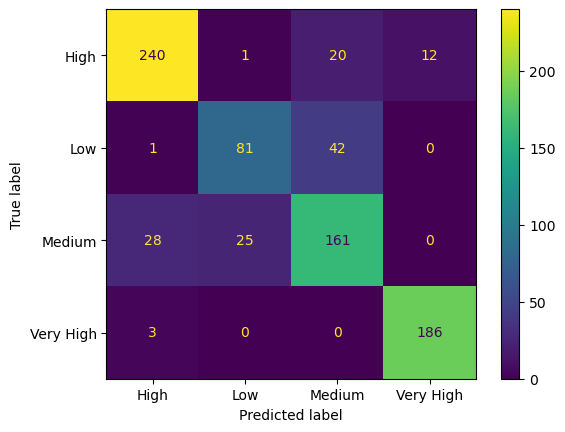

In [29]:
show_metrics(modLinear, X_test, y_test)

In [30]:
pipeTree = Pipeline([
    ('prep', preprocess),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [31]:
modTree = GridSearchCV(estimator = pipeTree,
                  param_grid = {'model__max_depth': [1,2,3, 4,5, 6,7, 8,9,10,11, 12, None],
                               'model__max_leaf_nodes': [16,32,64,128]},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [32]:
modTree.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['distance_km',
                                                                          'average_speed_kmph',
                                                                          'travel_time_minutes']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['start_area',
                                                                          'end_area',
                                                                          'time_of_day',
                                                                          'day_of_week',
                                                                          'weather_condition',
                                                                          'road_type'])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, None],
                         'model__max_leaf_nodes': [16, 32, 64, 128]},
             return_train_score=True, scoring='accuracy')

In [33]:
resultsTree = pd.DataFrame(modTree.cv_results_)

In [34]:
resultsTree["generalization_gap"] = (
    resultsTree["mean_train_score"] - resultsTree["mean_test_score"]
)

In [35]:
resultsTree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,generalization_gap
0,0.005912,0.000975,0.002313,2.994763e-04,1,16,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.447985,0.438613,0.467167,0.451255,0.011884,49,0.469761,0.462729,0.460169,0.464219,0.004055,0.012964
1,0.004845,0.000146,0.002054,3.604740e-05,1,32,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.447985,0.438613,0.467167,0.451255,0.011884,49,0.469761,0.462729,0.460169,0.464219,0.004055,0.012964
2,0.005024,0.000356,0.002065,7.565582e-05,1,64,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.447985,0.438613,0.467167,0.451255,0.011884,49,0.469761,0.462729,0.460169,0.464219,0.004055,0.012964
3,0.004796,0.000112,0.002000,1.627002e-05,1,128,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.447985,0.438613,0.467167,0.451255,0.011884,49,0.469761,0.462729,0.460169,0.464219,0.004055,0.012964
4,0.005353,0.000049,0.002049,1.122341e-05,2,16,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.476101,0.524836,0.501876,0.500938,0.019907,45,0.534459,0.536803,0.500469,0.523910,0.016603,0.022972
5,0.005313,0.000019,0.001981,1.476442e-05,2,32,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.476101,0.524836,0.501876,0.500938,0.019907,45,0.534459,0.536803,0.500469,0.523910,0.016603,0.022972
6,0.005448,0.000227,0.001987,2.329436e-05,2,64,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.476101,0.524836,0.501876,0.500938,0.019907,45,0.534459,0.536803,0.500469,0.523910,0.016603,0.022972
7,0.005087,0.000021,0.001912,6.126115e-06,2,128,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.476101,0.524836,0.501876,0.500938,0.019907,45,0.534459,0.536803,0.500469,0.523910,0.016603,0.022972
8,0.005739,0.000032,0.001913,1.548436e-05,3,16,"{'model__max_depth': 3, 'model__max_leaf_nodes...",0.607310,0.596064,0.648218,0.617197,0.022410,41,0.655884,0.593061,0.650422,0.633122,0.028415,0.015925
9,0.005731,0.000050,0.001918,1.215285e-05,3,32,"{'model__max_depth': 3, 'model__max_leaf_nodes...",0.607310,0.596064,0.648218,0.617197,0.022410,41,0.655884,0.593061,0.650422,0.633122,0.028415,0.015925


### max score when 9 max depth and 64 leaf nodes

Model: DecisionTreeClassifier
Accuracy: 0.85
Macro Precision: 0.8538454053984292
Macro Recall: 0.8247734794878298
Macro F1: 0.8330919321147764
Weighted F1: 0.8469244695746277
Cohen’s Kappa: 0.7935861186664803
MCC: 0.7952624525743165


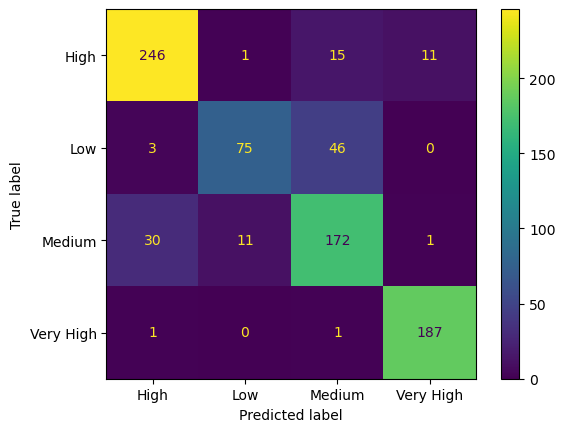

In [37]:
show_metrics(modTree, X_test, y_test)

In [38]:
pipeForest = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=42))
])

In [39]:
modForest = GridSearchCV(estimator = pipeForest,
                  param_grid = {'model__n_estimators': [100, 200, 300],
                                'model__max_depth': [None, 10, 20, 30],
                                'model__min_samples_split': [2, 5, 10],
                                'model__min_samples_leaf': [1, 2, 4],
                                'model__max_features': ['sqrt', 'log2']},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [85]:
%%time
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
modForest.fit(X_train, y_train)

CPU times: user 3min 16s, sys: 29.8 s, total: 3min 46s
Wall time: 1min 43s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['distance_km',
                                                                          'average_speed_kmph',
                                                                          'travel_time_minutes']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['start_area',
                                                                          'end_area',
                                                                          'time_of_day',
                                                                          'day_of_week',
                                                                          'weather_condition',
                                                                          'road_type'])])),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

Model: RandomForestClassifier
Accuracy: 0.8025
Macro Precision: 0.8029023200026169
Macro Recall: 0.776638626031903
Macro F1: 0.7841462096332543
Weighted F1: 0.7985042747157715
Cohen’s Kappa: 0.7279110716945716
MCC: 0.7294017253369753


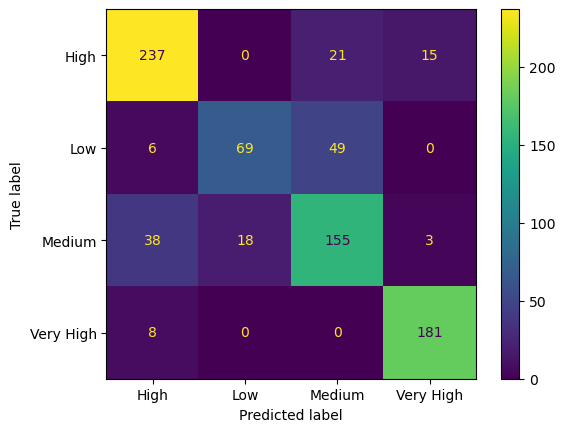

In [86]:
show_metrics(modForest, X_test, y_test)

### using the final estimators and ensembling

In [92]:
best_lr = modLinear.best_estimator_
best_dt = modTree.best_estimator_
best_rf = modForest.best_estimator_

In [96]:
voting_ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('dt', best_dt),
        ('rf', best_rf)
    ],
    voting='hard'
)

In [98]:
voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('prep',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('scale',
                                                                                                 StandardScaler())]),
                                                                                ['distance_km',
                                                                                 'average_speed_kmph',
                                                                                 'travel_time_minutes']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('encode',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse_output=False))]),
                                                                                ['start_area',
                                                                                 'end_area',
                                                                                 'time_of_day',
                                                                                 'day_of_week'...
                                                                                                 StandardScaler())]),
                                                                                ['distance_km',
                                                                                 'average_speed_kmph',
                                                                                 'travel_time_minutes']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('encode',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse_output=False))]),
                                                                                ['start_area',
                                                                                 'end_area',
                                                                                 'time_of_day',
                                                                                 'day_of_week',
                                                                                 'weather_condition',
                                                                                 'road_type'])])),
                                              ('model',
                                               RandomForestClassifier(max_depth=30,
                                                                      n_estimators=300,
                                                                      n_jobs=-1,
                                                                      random_state=42))]))])

In [100]:
y_pred_ensemble = voting_ensemble.predict(X_test)

In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Macro Precision:", precision_score(y_test, y_pred_ensemble, average="macro"))
print("Macro Recall:", recall_score(y_test, y_pred_ensemble, average="macro"))
print("Macro F1:", f1_score(y_test, y_pred_ensemble, average="macro"))
print("Weighted F1:", f1_score(y_test, y_pred_ensemble, average="weighted"))
print("Cohen’s Kappa:", cohen_kappa_score(y_test, y_pred_ensemble))
print("MCC:", matthews_corrcoef(y_test, y_pred_ensemble))

Accuracy: 0.84625
Macro Precision: 0.851267367260219
Macro Recall: 0.8230625624166474
Macro F1: 0.8317003075508096
Weighted F1: 0.843538044817552
Cohen’s Kappa: 0.7884157630256545
MCC: 0.7898616822734702


In [114]:
sample_input = {
    "distance_km": [6.2],
    "average_speed_kmph": [18],
    "time_of_day": ["Morning"],
    "day_of_week": ["Weekday"],
    "weather_condition": ["Clear"],
    "road_type": ["Urban"],
    "time": [9]
}


In [132]:
# must match training schema exactly
FEATURE_COLS = [
    'start_area',
    'end_area',
    'distance_km',
    'time_of_day',
    'day_of_week',
    'weather_condition',
    'road_type',
    'average_speed_kmph',
    'travel_time_minutes'
]

sample_input = {
    "start_area": ["Lajpat Nagar"],
    "end_area": ["Nehru Place"],
    "distance_km": [5.5],
    "time_of_day": ["Afternoon"],  
    "day_of_week": ["Weekday"],
    "weather_condition": ["Clear"],
    "road_type": ["Urban"],
    "average_speed_kmph": [28],     
    "travel_time_minutes": [12]  
}

sample_df = pd.DataFrame(sample_input)
sample_df = sample_df[FEATURE_COLS] 

prediction = voting_ensemble.predict(sample_df)
print("Predicted traffic density:", prediction[0])


Predicted traffic density: Medium


In [134]:
modLinear.predict(sample_df)

array(['Medium'], dtype=object)

In [136]:
modTree.predict(sample_df)

array(['High'], dtype=object)

In [138]:
modForest.predict(sample_df)

array(['Medium'], dtype=object)

In [144]:
import joblib

joblib.dump(voting_ensemble, "traffic_density_voting_model.joblib")

['traffic_density_voting_model.joblib']

In [146]:
FEATURE_COLS = [
    'start_area',
    'end_area',
    'distance_km',
    'time_of_day',
    'day_of_week',
    'weather_condition',
    'road_type',
    'average_speed_kmph',
    'travel_time_minutes'
]

joblib.dump(FEATURE_COLS, "traffic_model_features.joblib")

['traffic_model_features.joblib']